In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

- Fisher-Jenks algorithm, Jenks Optimisation Method or Fisher exact optimization method.


- Minimize each class's average deviation from the class mean, while maximizing each class's deviation from the means of the other classes. 


- The method seeks to reduce the variance within classes and maximize the variance between classes.


In [2]:
import jenkspy
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams.update({"font.size": 14})

<IPython.core.display.Javascript object>

In [4]:
feat = np.concatenate(
    [
        np.random.randint(20000, 80000, 600),
        np.random.randint(80000, 120000, 200),
        np.random.randint(120000, 180000, 150),
        np.random.randint(180000, 250000, 50),
    ]
)

feat = np.concatenate(
    [
        np.random.normal(50, 10, 1000),
        np.random.uniform(90, 110, 1000),
        np.random.normal(170, 20, 2000),
    ]
)

# np.random.shuffle(feat)
timestamp = ["t_" + str(i) for i in range(len(feat))]
df = pd.DataFrame({"timestamp": timestamp, "feat": feat})
df.head(10)

,timestamp,feat
0,t_0,44.331462
1,t_1,68.596974
2,t_2,42.684838
3,t_3,67.239206
4,t_4,44.404492
5,t_5,67.293653
6,t_6,53.232998
7,t_7,49.151991
8,t_8,55.512607
9,t_9,40.052791


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Feature Value')

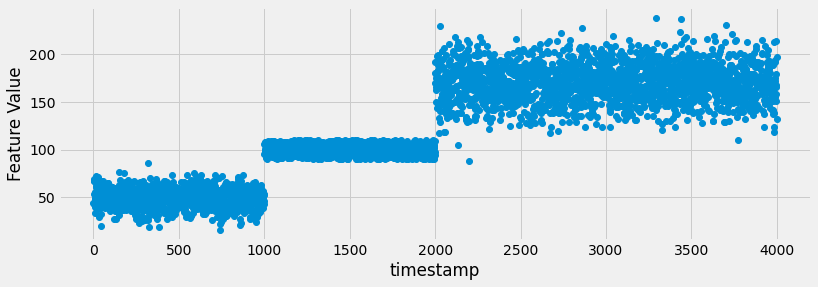

<IPython.core.display.Javascript object>

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(df["feat"], "o")
plt.xlabel("timestamp")
plt.ylabel("Feature Value")

In [6]:
nbins = 3
break_points = jenkspy.jenks_breaks(df["feat"], nb_class=nbins)
print(break_points)

[15.891659567422842, 75.1656271836834, 137.20848401974467, 238.32395876223165]


<IPython.core.display.Javascript object>

In [7]:
bin_labels = ["group_" + str(i) for i in range(1, 4)]
print(bin_labels)
df["feat_bin"] = pd.cut(df["feat"], bins=break_points, labels=bin_labels)
df.sample(10)

['group_1', 'group_2', 'group_3']


,timestamp,feat,feat_bin
2615,t_2615,193.045841,group_3
1126,t_1126,102.392199,group_2
2669,t_2669,172.763233,group_3
3656,t_3656,169.933182,group_3
505,t_505,40.872414,group_1
3742,t_3742,172.864447,group_3
3633,t_3633,137.539884,group_3
2864,t_2864,176.174214,group_3
3811,t_3811,169.703589,group_3
3598,t_3598,186.644179,group_3


<IPython.core.display.Javascript object>

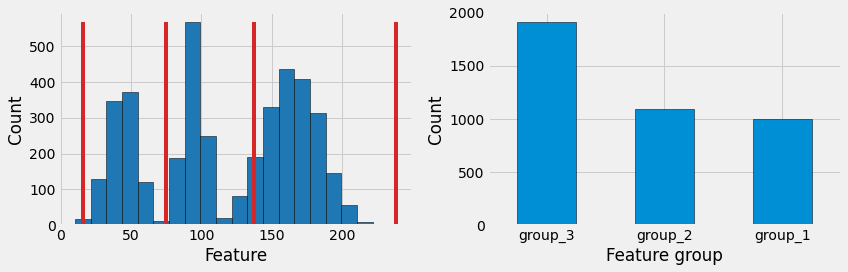

<IPython.core.display.Javascript object>

In [8]:
plt.subplot(1, 2, 1)
hist = plt.hist(df["feat"], bins=20, align="left", color="tab:blue", edgecolor="black")
for bp in break_points:
    plt.vlines(bp, ymin=0, ymax=max(hist[0]), color="tab:red")
plt.xlabel("Feature")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
df["feat_bin"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Feature group")
plt.ylabel("Count")
plt.tight_layout()

Text(0, 0.5, 'Histogram (Count)')

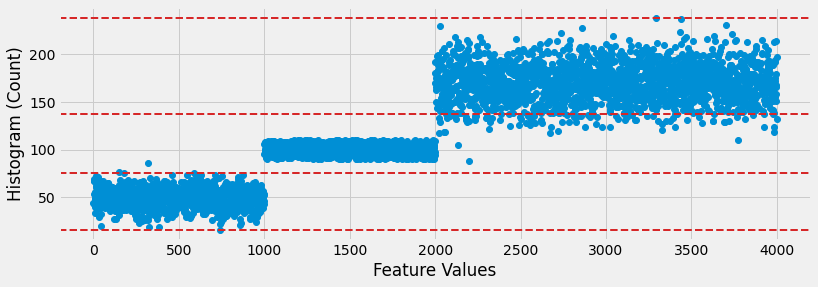

<IPython.core.display.Javascript object>

In [9]:
plt.plot(df["feat"], "o")
for i in break_points:
    plt.axhline(
        i, color="tab:red", linestyle="dashed", linewidth=2,
    )
plt.xlabel("Feature Values")
plt.ylabel("Histogram (Count)")